## Preface



In [1]:
!pip install -r requirements.txt

import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

# Uncomment for use in Jupyter Notebook
%matplotlib widget

# If widget doesn't work, try this (for static images)
#%matplotlib inline

## Consumer Demand for Food



-   Minimum cost model can be regarded as *prescriptive* or *descriptive*.  In the former case it&rsquo;s a way of saying what people *should* eat.  In the latter it&rsquo;s a way of saying what people *do* eat.



### Questions



-   How do actual diets compare with minimum cost diets?
-   How can changes in food prices affect demand for different kinds  of food?
-   How can changes in  income affect demand for different kinds of food?
-   Is there a set of prices and incomes that ensure people will choose to consume a nutritious diet?



### Consumer&rsquo;s problem



The basic consumer&rsquo;s problem considers the problem of allocating a budget $x$ to purchase consumption goods (including but not limited to different kinds of food).  The consumer is thought to try to choose goods to maximize their *utility*.  Utility in turn is a function that maps *consumption bundles* into the  real line&#x2014;one can think of the level of utility as corresponding to the consumer&rsquo;s happiness or satisfaction.

The problem is expressed mathematically as
   $$
      \max_{c\in\Re^n_{++}} U(c) \qquad\text{such that $p'c\leq x$,}
   $$
where $U:\Re^n_{++}\rightarrow\Re$ is generally assumed to be an increasing, concave, and continuously differentiable function of consumption; $c$ is the consumption bundle; $p$ is a vector of prices for the various goods in $c$; and $x$ is the consumer&rsquo;s total budget.



#### Cobb-Douglas Example Utility Function



Let&rsquo;s consider a particular utility function which  takes the form
    $$
       U(c) = \sum_{i=1}^n\alpha_i\log c_i.
    $$
This logarithmic form is sometimes called a *Cobb-Douglas* utility function, named after a mathematician Charles Cobb and an economist (later Senator) Paul Douglas, who devised the mathematical form as a way of modeling [production](https://en.wikipedia.org/wiki/Cobb%25E2%2580%2593Douglas_production_function).



In [2]:
import consumerdemands as demands

# Cobb-Douglas utility is a special case of a more general class
def cobb_douglas_utility(alpha):
    """
    Define Cobb-Douglas utility function.
    """
    n = len(alpha)
    U = lambda c: demands.utility(c,alpha,[1]*n,[0]*n)

    return U

# Two good case:
alpha=[0.3,0.7] # Preference parameters

U = cobb_douglas_utility(alpha)

Now construct a 3-d plot of the utility function for us to visualize:



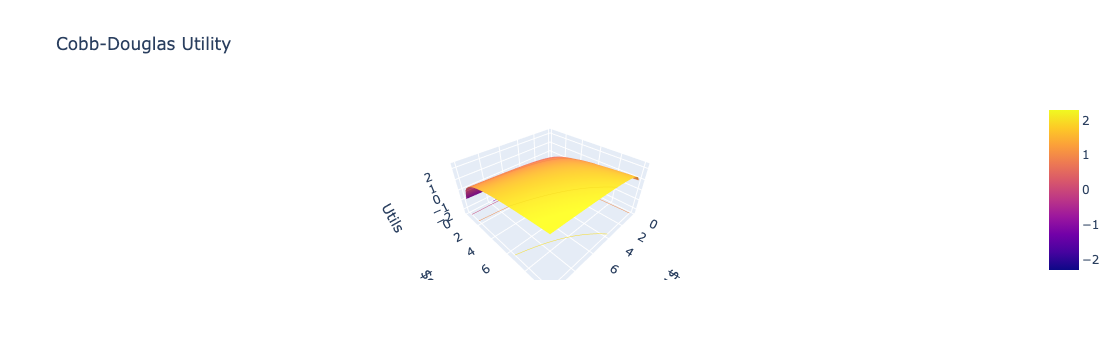

In [3]:
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np


# Commodity space
c1 = np.linspace(0.1, 10, 30)
c2 = np.linspace(0.1, 10, 30)

Utils = np.array([[U([c_1,c_2]) for c_1 in c1] for c_2 in c2])

utils = [
    go.Surface(
        x=c1,
        y=c2,
        z=Utils,
        contours=go.surface.Contours(
            z=go.surface.contours.Z(
              show=True,
              usecolormap=True,
              highlightcolor="#42f462",
              project=dict(z=True)
            )
        )
    )
]

layout = go.Layout(
    title='Cobb-Douglas Utility',
    scene={'xaxis':{'title':'$c_1$'},
           'yaxis':{'title':'$c_2$'},
           'zaxis':{'title':'Utils'}})

fig = go.Figure(data=utils, layout=layout)

py.iplot(fig, filename='latex')

##### Questions



Some questions covering basic consumer demand that should be familiar.  If not, consult a textbook on intermediate microeconomics (such as [Perloff&rsquo;s textbook with calculus](https://www.amazon.com/Microeconomics-Applications-Calculus-Pearson-Economics/dp/0134167384)).  Or for a concise high-level treatment see the excellent (and free!) [Introduction by Arne Hallam](http://www2.econ.iastate.edu/faculty/hallam/Microeconomics/Intro-Micro.pdf).

1.  Economists would call the $(c_1,c_2)$ plane the &ldquo;commodity space&rdquo;.  Explain.
2.  The contour lines in the figure are called &ldquo;Indifference curves&rdquo;.  Why is this sensible?
3.  Economists call the partial derivatives of the utility function with respect to $c_1$ and $c_2$ *marginal utilities*.  Give a graphical interpretation of the marginal utility of $c_1$ (holding     $c_2$ fixed).
4.  Pick out a point on an indifference curve.  What is its slope in the $(c_1,c_2)$ plane?
5.  Economists call (minus) the slope in the previous question the consumer&rsquo;s *marginal rate of substitution*.  Explain.



##### The Budget Constraint



Now, how about  the budget constraint?



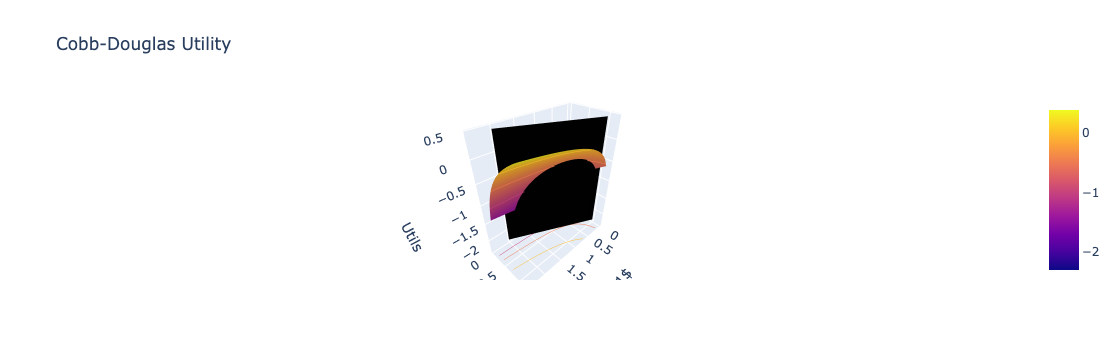

In [4]:
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import consumerdemands as demands

py.init_notebook_mode(connected=True)

########### Play with these parameters
parms = {'alpha':[0.3,0.7], # Preference parameters
         'beta':[1,1], # Curvature parameters
         'phi':0}

####################

U = lambda c: demands.utility(c,**parms)

# Prices of goods
p = (1,2)

# Budget
x=2

c1 = np.linspace(0.1, x/p[0]*1.2, 30)
c2 = np.linspace(0.1, x/p[1]*1.2, 30)

Utils = np.array([[U([c_1,c_2]) for c_1 in c1] for c_2 in c2])

Ustar =  demands.marshallian.indirect_utility(x,p,parms)

xs = [0,x/p[0],0,x/p[0]]
ys = [x/p[1],0,x/p[1],0]
zs = [Utils.min(),Utils.min(),Utils.max()*1.1,Utils.max()*1.1]

budget= [{
    'type': 'mesh3d',
    'x': xs,
    'y': ys,
    'z': zs,
    'delaunayaxis':'x',
    'color': 'black',
    'opacity': 1.0,
}]

utils = [
    go.Surface(
        x=c1,
        y=c2,
        z=Utils,
        contours=go.surface.Contours(
            z=go.surface.contours.Z(
              show=True,
              usecolormap=True,
              highlightcolor="#42f462",
              project=dict(z=True)
            )
        )
    )
]

data = budget + utils


layout = go.Layout(
    title='Cobb-Douglas Utility',
    scene={'xaxis':{'title':'$c_1$'},
           'yaxis':{'title':'$c_2$'},
           'zaxis':{'title':'Utils'}})

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='latex')

The budget constraint here is the black line/form.



###### Questions



1.  How is the budget constraint determined by prices $p$ and budget $x$?
2.  The figure above shows a tangency between the budget line and a particular indifference curve.  Show that this point &ldquo;solves&rdquo; the consumer&rsquo;s problem, in the sense that it maximizes utility subject to the consumer&rsquo;s budget constraint.



##### Demands



We&rsquo;ve seen how one can find demands given a utility function and a budget constraint.  As one varies the price of a particular good (given a fixed budget and holding other prices fixed) one traces out the *demand curve* for the good.

The following code does this for the same utility function we explored above.  Note that for obscure historical reasons ([Alfred](https://en.wikipedia.org/wiki/Alfred_Marshall) & [Mary Paley Marshall](https://en.wikipedia.org/wiki/Mary_Paley_Marshall) are to blame) it&rsquo;s conventional to plot the independent variable &ldquo;price&rdquo; on the vertical axis, instead of the horizontal.



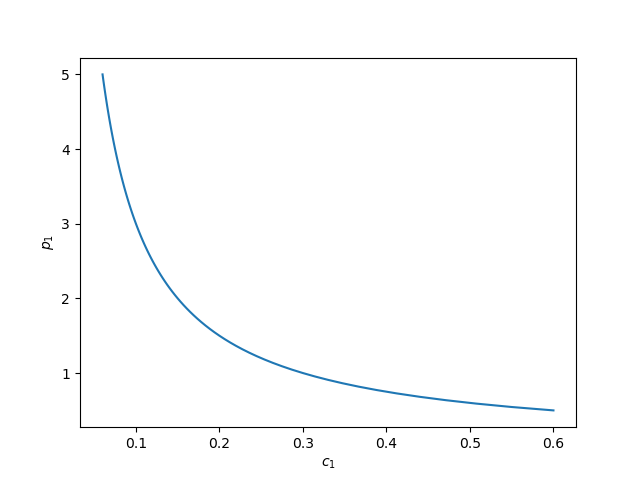

In [5]:
from consumerdemands import marshallian
import numpy as np
import matplotlib.pyplot as plt

# Demand for c_1 as a function of own price
D1 = lambda p1,p2=1,x=1: marshallian.demands(x,(p1,p2),parms)[0]

P = np.linspace(.5,5,100)

plt.plot([D1(p1) for p1 in P],P)
plt.xlabel('$c_1$')
plt.ylabel('$p_1$')

plt.show()

###### Questions



1.  How does the demand curve for $c_1$ change if the price of the other good changes?
2.  How does the demand curve for $c_1$ change if the budget $x$ changes?



##### Engel Curves



The &ldquo;demand curve&rdquo; traces out how demand for a good changes as its price changes.  If prices remain fixed and the consumer&rsquo;s *budget* increases this describes what we call an [Engel](https://en.wikipedia.org/wiki/Ernst_Engel) curve.



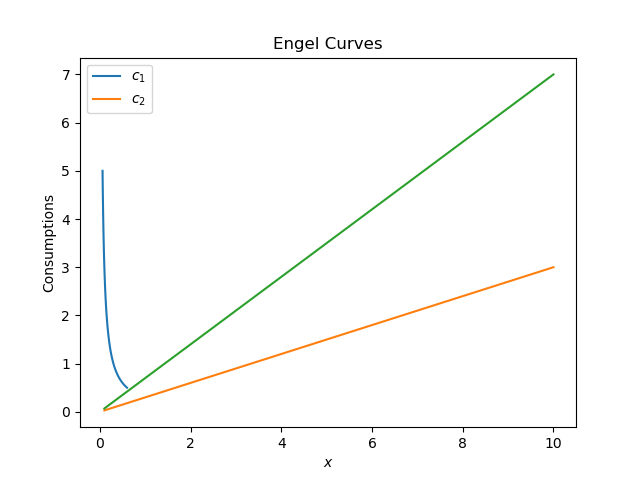

In [6]:
from consumerdemands import marshallian
import numpy as np
import matplotlib.pyplot as plt

# Demand for c_1 as a function of own price
E1 = lambda x,p1=1,p2=1: marshallian.demands(x,(p1,p2),parms)

X = np.linspace(.1,10,100)

plt.plot(X,[E1(x)[0] for x in X],X,[E1(x)[1] for x in X])
plt.xlabel('$x$')
plt.ylabel('Consumptions')
plt.legend(('$c_1$','$c_2$'))
plt.title('Engel Curves')

plt.show()

###### Questions



1.  How do the Engel curves depend on prices?
2.  In the Cobb-Douglas case the parameters $\alpha_i$ are sometimes called &ldquo;budget shares.&rdquo;  Why does this makes sense?



#### Constant Frisch Elasticity (CFE) Example Utility Function



The Cobb-Douglas utility function is a special case of a more general class of utility functions.  These allow different curvatures in the utility derived from each good, unlike the Cobb-Douglas case.  They take the form
    $$
       U(c) =\sum_{i=1}^n\alpha_i\frac{\beta_i}{\beta_i-1}(c_i^{1-1/\beta_i} -1).
    $$
Thus, where the Cobb-Douglas case had an $n$-vector of parameters $\alpha$, the CFE case has two $n$-vectors, &alpha; and &beta;.



In [7]:
import consumerdemands as demands

########### Play with these parameters
parms = {'alpha':[0.3,0.7], # Preference parameters
         'beta':[5,1], # Curvature parameters
         'phi':0}

####################

U = lambda c: demands.utility(c,**parms)

Now construct a 3-d plot of the utility function for us to visualize:



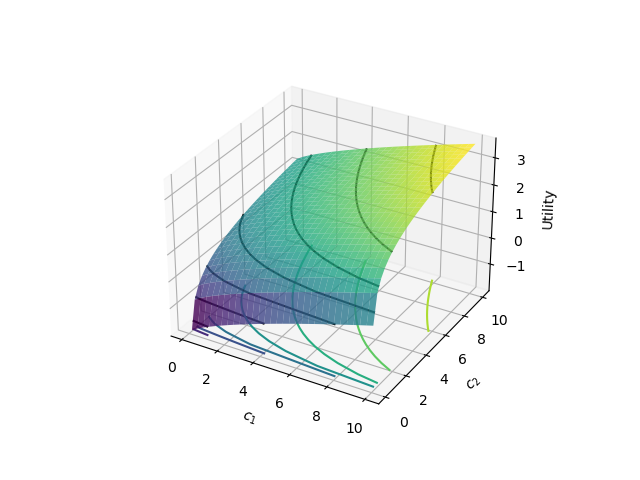

In [8]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')

# Commodity space
c1 = np.linspace(0.1, 10, 30)
c2 = np.linspace(0.1, 10, 30)

C1,C2 = np.meshgrid(c1,c2)

Utils = np.array([[U([c_1,c_2]) for c_1 in c1] for c_2 in c2])

ax.plot_surface(C1, C2, Utils, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none',alpha=0.8)

ax.set_xlabel('$c_1$')
ax.set_ylabel('$c_2$')
ax.set_zlabel('Utility')

# Plot indifference curves
ax.contour(C1,C2,Utils,offset=Utils.min())
ax.contour(C1,C2,Utils, colors="k", linestyles="solid")

plt.show()

##### Demands



We&rsquo;ve seen how one can find demands given a utility function and a budget constraint.  As one varies the price of a particular good (given a fixed budget and holding other prices fixed) one traces out the *demand curve* for the good.

The following code does this for the same utility function we explored above.  Note that for obscure historical reasons it&rsquo;s conventional to plot the independent variable &ldquo;price&rdquo; on the vertical axis, instead of the  horizontal.



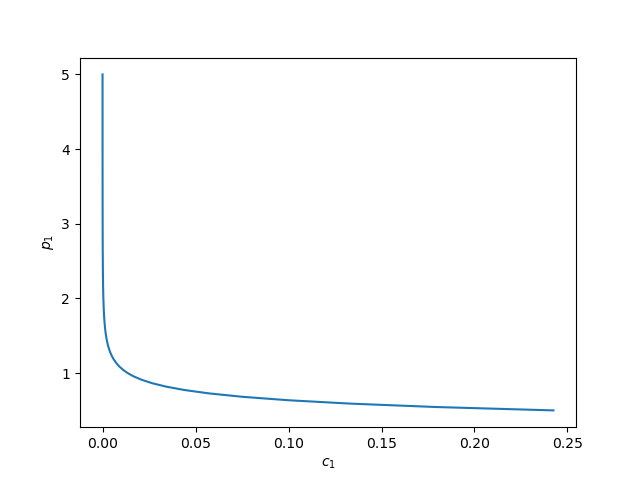

In [9]:
from consumerdemands import marshallian
import numpy as np
import matplotlib.pyplot as plt

# Demand for c_1 as a function of own price
D1 = lambda p1,p2=1,x=1: marshallian.demands(x,(p1,p2),parms)[0]

P = np.linspace(.5,5,100)

fig,ax = plt.subplots()

#### Play with  p2 & x below!
ax.plot([D1(p1,p2=1,x=1) for p1 in P],P)

ax.set_xlabel('$c_1$')
ax.set_ylabel('$p_1$')

plt.show()

###### Questions



1.  How does the demand curve for $c_1$ change if the price of  the other good changes?
2.  How does the demand curve for $c_1$ change if the budget $x$ changes?



##### Engel Curves



The &ldquo;demand curve&rdquo; traces out how demand for a good changes as its price changes.  If prices remain fixed and the consumer&rsquo;s *budget* increases this describes what we call an [Engel](https://en.wikipedia.org/wiki/Ernst_Engel) curve.



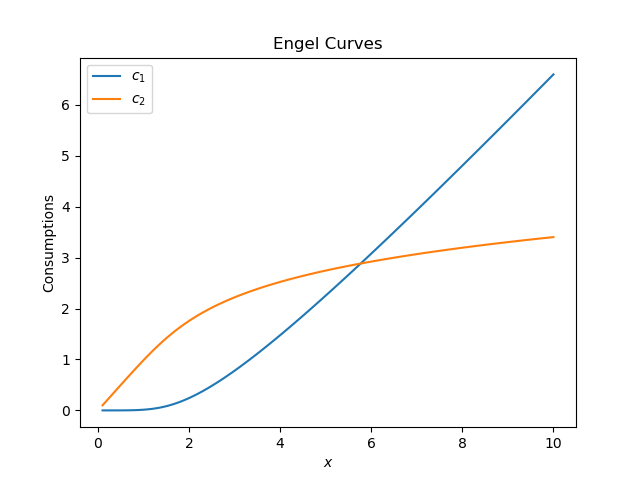

In [10]:
from consumerdemands import marshallian
import numpy as np
import matplotlib.pyplot as plt

# Demand for c_1 as a function of own price
E1 = lambda x,p1=1,p2=1: marshallian.demands(x,(p1,p2),parms)

X = np.linspace(.1,10,100)

fig,ax = plt.subplots()

#### Play with prices p1 & p2 below!
Ecurves = list(zip(*[E1(x,p1=1,p2=1) for x in X]))

ax.plot(X,Ecurves[0],X,Ecurves[1])

ax.set_xlabel('$x$')
ax.set_ylabel('Consumptions')
ax.legend(('$c_1$','$c_2$'))
ax.set_title('Engel Curves')

plt.show()

##### Final Questions for your team



Suppose there are three or more goods



In [11]:
import consumerdemands as demands

########### Play with these parameters
parms = {'alpha':[0.2,0.7,0.1], # Preference parameters
         'beta':[.5,.75,1.5], # Curvature parameters
         'phi':0}

####################

You can play with the utility function



In [12]:
U = lambda c: demands.utility(c,**parms)

1.  What is the level of utility if prices are all equal to one, and income is equal to one?  What happens if income doubles?

2.  Write code to calculate the Marshallian demands.  If all prices are equal to one, and income is equal to one, then how much is demanded of each good?

3.  If the price of good one changes, what happens to the demand for all three goods?

4.  Marshallian (uncompensated) demands depend on prices and income; Hicksian (compensated) demands depend on prices and the level of utility.  Here&rsquo;s how you can define hicksian demand schedules:

\#+begin<sub>src</sub> jupyter-python
from consumerdemands import hicksian
h =  hicksian.demands(x,(p1,p2),parms)
\#end<sub>src</sub>

